# Latar Belakang

Sebagai tugas Capstone Project untuk Modul dua, kita coba untuk melakukan data analasis meggunakan *descriptive statistics* terhadap *TSA CLAIMS DATABASE*. TSA adalah agensi milik *USA* yang memiliki otoritas terhadap keamanan transportasi. Database ini berisi tentang *historical data* mengenai semua klaim dari 2002 sampai 2015 di semua bandara di Amerika. Kita mencoba melakukan *descriptive statistics* untuk mencari informasi yang bermanfaat untuk membantu *stakeholder* yang bersangkutan.   



# Pernyataan Masalah

Kita ingin mengetahui bagaimana tren dari jumlah laporan klaim yang diajukan penumpang terhadap TSA setiap tahunnya. Kemudian, tipe klaim apa yang paling banyak diajukan oleh penumpang. Informasi ini nantinya bisa digunakan oleh pihak TSA, Airline, maupun Airport untuk meningkatkan kualitas pelayanan mereka sehingga jumlah klaim yang diajukan oleh penumpang bisa berkurang.

> # Workflow

* Read Data, menampilkan seluruh raw data yang akan di analysis
* Data Cleaning, membersihkan data yang duplikat, missing values, atau format dan type yang tidak sesuai
* Data Analysis, melakukan analisa data secara statistik untuk mendapatkan informasi yang   
dapat digunakan perusahaan untuk mengambil keputusaan

# READ DATA

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv(r'D:\Dokumen\Kerja\File Capstone 2\tsa_claims.csv')

# mengubah nama kolom ke huruf kecil dan memberikan underscore agar lebih mudah ketika dipanggil di dalam code
df.columns = [s.strip().replace(" ","_") for s in df.columns.str.lower()]

display(df.head(), df.tail())

C:\Users\Irfan\AppData\Local\Temp\ipykernel_10444\1799810038.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Dokumen\Kerja\File Capstone 2\tsa_claims.csv')


,claim_number,date_received,incident_date,airport_code,airport_name,airline_name,claim_type,claim_site,item,claim_amount,status,close_amount,disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,claim_number,date_received,incident_date,airport_code,airport_name,airline_name,claim_type,claim_site,item,claim_amount,status,close_amount,disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


In [4]:
len(df)

204267

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   claim_number   204267 non-null  object
 1   date_received  204004 non-null  object
 2   incident_date  202084 non-null  object
 3   airport_code   195743 non-null  object
 4   airport_name   195743 non-null  object
 5   airline_name   169893 non-null  object
 6   claim_type     196354 non-null  object
 7   claim_site     203527 non-null  object
 8   item           200301 non-null  object
 9   claim_amount   200224 non-null  object
 10  status         204262 non-null  object
 11  close_amount   135315 non-null  object
 12  disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


# Data Cleaning

Seperti yang dilihat diatas raw data yang kita dapat masih sangat berantakan. Dengan banyaknya missing values dan juga format penulisan yang tidak konsisten.   
Oleh karena itu, sebelum masuk kedalam data analysis kita perlu untuk membersihkan dataset-nya terlebih dahulu.

## A. Simplify and Re-format

### 1. claim_number

Claim number seharusnya merupakan data yang unik dalam dataset ini, sehingga satu claim number hanya mewakili satu klaim.   
Oleh karena itu, kita akan menghapus klaim number yang memiliki duplikat.

In [6]:
# CHECK DUPLICATE IN CLAIM NUMBER

double = df['claim_number'].duplicated()

print(f'Jumlah data claim_number yang duplikat ada', df['claim_number'].loc[double == True].count(),'.')

Jumlah data claim_number yang duplikat ada 9 .


In [7]:
# DROP DUPLICATE IN CLAIM NUMBER
df.drop_duplicates(subset='claim_number', keep = 'first', inplace=True)

In [8]:
# CHECK DUPLICATE IN CLAIM NUMBER
double = df['claim_number'].duplicated()
print(f'Jumlah data claim_number yang duplikat ada', df['claim_number'].loc[double == True].count(),'.')
print(len(df))

Jumlah data claim_number yang duplikat ada 0 .
204258


### 2. date_received & incident_date

Kedua kolom ini harusnya memilki format tanggal untuk memudahkan kita menganalisa data. Tetapi, bisa dilihat format kedua kolom ini masih tidak beraturan dan cara penulisan yang berbeda.

In [9]:
df[['date_received', 'incident_date']]

,date_received,incident_date
0,4-Jan-02,12/12/2002 0:00
1,2-Feb-02,1/16/2004 0:00
2,4-Feb-02,11/26/2003 0:00
3,7-Feb-02,1/6/2003 0:00
4,18-Feb-02,2/5/2005 0:00
...,...,...
204262,20-Nov-15,16-Oct-15
204263,17-Dec-15,2-Dec-15
204264,22-Dec-15,20-Dec-15
204265,30-Dec-15,28-Dec-15


In [10]:
# FIX THE DATE FORMAT OF DATE RECEIVED

df["date_received"] = pd.to_datetime(df.date_received,format="%d-%b-%y")

df['date_received'].head()

0   2002-01-04
1   2002-02-02
2   2002-02-04
3   2002-02-07
4   2002-02-18
Name: date_received, dtype: datetime64[ns]

In [11]:
# FIX THE DATE FORMAT OF INCIDENT DATE

display(df[['incident_date']].head(3), df[['incident_date']].tail(3))

,incident_date
0,12/12/2002 0:00
1,1/16/2004 0:00
2,11/26/2003 0:00


,incident_date
204264,20-Dec-15
204265,28-Dec-15
204266,23-Nov-15


Dalam kolom incident date ada beberapa macam penulisan:
* format yang memiliki time, contoh 12/12/2002 0:00
* format yang salah penulisan tahunnya, contoh 01/jul/0200
* format yang nama bulanya menggunakan abjad, contoh 20-Dec-15


Handling:
* untuk yang memilki time kita akan split datanya.
* untuk format yang salah penulisan tahunnya, kita akan drop menggunakan *regex* karena sulit untuk menebak tahun sebenarnya dari data tersebut.
* untuk format menggunakan abjad kita akan rapikan menggunakan *regex*.


In [12]:
# Kita coba untuk menyamakan format penulisan datenya terlebih dahulu

df["incident_date"] = df.incident_date.str.replace("-","/")
df["incident_date"] = df.incident_date.str.lower()

In [13]:
# Kita drop missing values, agar tidak mengganggu proses looping untuk splitting antara date dan time-nya.
df.dropna(subset=["incident_date"], inplace=True)

In [14]:
# Looping untuk memisahkan antara date dan time

incident_time = []
incident_dates = []

for row in df['incident_date']:
    x = row.split(" ")
    n_element = len(x)
    if n_element == 1:
        incident_dates.append(x[0])
    elif n_element == 2:
        incident_dates.append(x[0])
        incident_time.append(x[1]) 

In [15]:
# Menambahkan kolom baru yaitu incident_dates 
df['incident_dates'] = incident_dates

# Drop kolom yang lama
df = df.drop(labels='incident_date', axis = 1)

In [16]:
display(df[['incident_dates']].head(3), df[['incident_dates']].tail(3))

,incident_dates
0,12/12/2002
1,1/16/2004
2,11/26/2003


,incident_dates
204264,20/dec/15
204265,28/dec/15
204266,23/nov/15


In [17]:
# Banyak tanggal yang memiliki format tahun yang salah seperti 01/jul/0200
# atau 01/apr/0100, untuk itu kita menghapusnya
df['incident_dates'].loc[df['incident_dates'] == '01/jul/0200']

67678    01/jul/0200
Name: incident_dates, dtype: object

In [18]:
# Kita menghapus incident date yang memiliki format yang salah menggunakan regex
regex = re.compile(r"/[a-z]{3}/[0-9]{4}")
df = df[df.incident_dates.map(lambda x: not bool(regex.search(x)))]

In [19]:
# Fungsi untuk merubah format 23/nov/15 menjadi 20xx - month - date
month_dict = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

def format_dates(regex, date_string):
    m = regex.match(date_string)
    if(m):
        day, month, year = m.group(1,2,3) # format datenya 23/nov/15
        return "{}/{}/{}".format(month_dict[month],day,"20"+year)
    else:
        return date_string

In [20]:
 # regex dari format 23/nov/15
regex = re.compile(r"(\d*)/([a-z]{3})/(1[1-5])$")
df["incident_dates"] = df.incident_dates.map(lambda x: format_dates(regex,x) )

In [21]:
# Mengganti type ke datetime
df.incident_dates.replace("6/30/10","06/30/2010",inplace=True)

df["incident_dates"] = pd.to_datetime(df.incident_dates,format="%m/%d/%Y")

In [22]:
# Format data yang sudah dirapikan

display(df[['incident_dates', 'date_received']].head(3), df[['incident_dates', 'date_received']].tail(3))

,incident_dates,date_received
0,2002-12-12,2002-01-04
1,2004-01-16,2002-02-02
2,2003-11-26,2002-02-04


,incident_dates,date_received
204264,2015-12-20,2015-12-22
204265,2015-12-28,2015-12-30
204266,2015-11-23,2015-12-31


### 3. airport_code & airport_name

In [23]:
df[['airport_code', 'airport_name']]

,airport_code,airport_name
0,EWR,Newark International Airport
1,SEA,Seattle-Tacoma International
2,STL,Lambert St. Louis International
3,MIA,Miami International Airport
4,MCO,Orlando International Airport
...,...,...
204262,-,-
204263,-,-
204264,-,-
204265,-,-


Berdasarkan data diatas kita akan mengubah dan mengecek:
* Apakah ada lebih dari 1 airport_name didalam airport_code?
* Mengubah data yang bernilai '-' menjadi 'Others'.

In [24]:
df.airport_code.replace('-', 'Others', inplace=True)

In [25]:
df.groupby("airport_code").airport_name.nunique().sort_values(ascending=False).head()

airport_code
JHM    2
LGA    2
SWF    2
MCW    2
HIB    2
Name: airport_name, dtype: int64

In [26]:
print(df['airport_name'].loc[df['airport_code']=='LGA'].unique())
print(df['airport_name'].loc[df['airport_code']=='MCW'].unique())

['LaGuardia' 'LaGuardia ']
['Mason City Municipal Airport' 'Mason City Municipal Airport ']


In [27]:
# Dari hasil pengamatan diatas hal ini disebabkan oleh kelebihan spasi.
# Kita akan hilangkan spasinya
df["airport_code"] = df.airport_code.str.strip()
df["airport_name"] = df.airport_name.str.strip()

In [28]:
print(df.groupby("airport_code").airport_name.nunique().sort_values(ascending=False).head())
print(df['airport_name'].loc[df['airport_code']=='LGA'].unique())
print(df['airport_name'].loc[df['airport_code']=='MCW'].unique())

airport_code
PNS    2
BZN    2
ABE    1
MVY    1
OMA    1
Name: airport_name, dtype: int64
['LaGuardia']
['Mason City Municipal Airport']


In [29]:
print(df['airport_name'].loc[df['airport_code']=='PNS'].unique())
print(df['airport_name'].loc[df['airport_code']=='BZN'].unique())

# Untuk airport_code PNS dan BZN, ternyata memiliki dua nama tempat yang berbeda
# Setelah investigasi menggunakan google, ternyata lokasi tempat tersebut sama
# Hanya penyebutannya saja yang berbeda

['Pensacola Regional' 'Pensacola International Airport']
['Gallatin Field' 'Bozeman Yellowstone International Airport']


In [30]:
df.airport_name.replace('Gallatin Field', 'Bozeman Yellowstone International Airport', inplace=True)
df.airport_name.replace('Pensacola Regional', 'Pensacola International Airport', inplace=True)

# Ubah string '-' menjadi 'Others'
df.airport_name.replace('-', 'Others', inplace=True)

In [31]:
df[['airport_code', 'airport_name']]

,airport_code,airport_name
0,EWR,Newark International Airport
1,SEA,Seattle-Tacoma International
2,STL,Lambert St. Louis International
3,MIA,Miami International Airport
4,MCO,Orlando International Airport
...,...,...
204262,Others,Others
204263,Others,Others
204264,Others,Others
204265,Others,Others


### 4. airline_name

In [32]:
df.groupby('airline_name').airline_name.nunique().sort_values(ascending=False)

airline_name
-                           1
Midwest Express Airlines    1
Mountain West               1
Mountain Air Express Inc    1
Montair Aviation Inc        1
                           ..
Cayman Airlines             1
Cayman Airlines             1
Cathay Pacific - CX         1
Carribean Airlines          1
vivaAerobus                 1
Name: airline_name, Length: 318, dtype: int64

Dari data diatas kita akan: 
* Kita bisa lihat *Cayman Airlines* muncul dua kali. Ini mengindikasikan ada spasi berlebih pada akhir kalimat. Kita akan hilangkan spasi tersebut.
* Mengganti '-' menjadi 'Others'.

In [33]:
# Menghilangkan spasi berlebih

df["airline_name"] = df.airline_name.str.strip()

In [34]:
# Mengganti '-' menjadi 'Others'
df.airline_name.replace('-', 'Others', inplace=True)

### 5. claim_type & claim_site

Untuk kolom *claim_type* dan *claim_site* kita hanya akan mengganti string '-' menjadi 'Others' supaya dataset menjadi lebih konsisten.

In [35]:
df['claim_site'].value_counts()

Checked Baggage    158960
Checkpoint          39960
Other                1682
Motor Vehicle         471
-                     276
Bus Station            16
Name: claim_site, dtype: int64

In [36]:
df['claim_type'].value_counts()

Passenger Property Loss    117399
Property Damage             74983
Personal Injury              1456
Employee Loss (MPCECA)        485
Passenger Theft               465
Motor Vehicle                 368
-                             282
Complaint                      48
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: claim_type, dtype: int64

In [37]:
df.claim_type.replace('-', 'Others', inplace=True)

In [38]:
df.claim_site.replace('-', 'Others', inplace=True)
df.claim_site.replace('Other', 'Others', inplace=True)

In [39]:
print (df['claim_site'].value_counts().head())
print(df['claim_type'].value_counts().head())

Checked Baggage    158960
Checkpoint          39960
Others               1958
Motor Vehicle         471
Bus Station            16
Name: claim_site, dtype: int64
Passenger Property Loss    117399
Property Damage             74983
Personal Injury              1456
Employee Loss (MPCECA)        485
Passenger Theft               465
Name: claim_type, dtype: int64


### 6. claim_amount

In [40]:
print(df[['claim_amount']].head(10))
print(df['claim_amount'].tail(5))

  claim_amount
0     $350.00 
1     $100.00 
2     $278.88 
3      $50.00 
4      $84.79 
5     $459.01 
6     $106.52 
7      $75.00 
8   $2;270.09 
9   $4;457.29 
204262    -
204263    -
204264    -
204265    -
204266    -
Name: claim_amount, dtype: object


Kalau kita lihat dari data diatas : 
* Kita akan menghilangkan simbol '$' dan ';'.
* Mengganti simbol '-' menjadi 0.
* mengganti tipe kolom menjadi *float*. 


In [41]:
# Fix the format claim_amount

df["claim_amount"] = df.claim_amount.str.strip()

# kita mencoba mengilangkan simbol ';' , '$' , dan mengganti simbol '-' menjadi 0
df["claim_amount"] = df.claim_amount.str.replace(";","",regex=True).str.replace("$","",regex=True).str.replace("-","0",regex=True)

# kita masukan ke kolom yang baru untuk mempermudah workflow
df["claim_amount"] = df.claim_amount.astype(float)


df['claim_amount'].describe()

count    1.993440e+05
mean     1.512019e+07
std      6.719254e+09
min      0.000000e+00
25%      1.500000e+01
50%      1.000000e+02
75%      3.200000e+02
max      3.000000e+12
Name: claim_amount, dtype: float64

In [42]:
df.claim_amount.isna().sum()

2567

### 7. status

In [43]:
# Menyederhanakan kategori dalam status
df[['status']].value_counts().sort_values(ascending=False)

status                                                                                                                       
Denied                                                                                                                           67923
Approved                                                                                                                         34733
Deny                                                                                                                             28234
Settled                                                                                                                          27727
-                                                                                                                                12749
Approve in Full                                                                                                                  12364
Canceled                                                        

Kalau kita lihat dari pengamatan data diatas dan juga pemahaman terhadap proses Klaim:
* Status dapat dibagi dua tipe yaitu *final decision* dan *still in process*.
* *Final decision* contohnya, denied, approved, settled, dan canceled.
* *Still in process* status biasanya masih dalam tahap pemeriksaan, contohnya in review.

In [44]:
in_process = ['Claim entered','In litigation', 'In review', 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
        'Closed as a contractor claim','Claim has been assigned for further investigation','Pending response from claimant','-' ]


df.status.replace(in_process,'In Process', inplace=True)
df.status.replace('Deny', 'Denied', inplace=True)
df.status.replace('Approve in Full', 'Approved', inplace=True)
df.status.replace('Settle', 'Settled', inplace=True)
df.status.replace('Canceled', 'Denied', inplace=True)

In [45]:
df[['status']].value_counts().sort_values(ascending=False)

status    
Denied        102568
Approved       47097
Settled        33491
In Process     18755
dtype: int64

## B. Missing Values

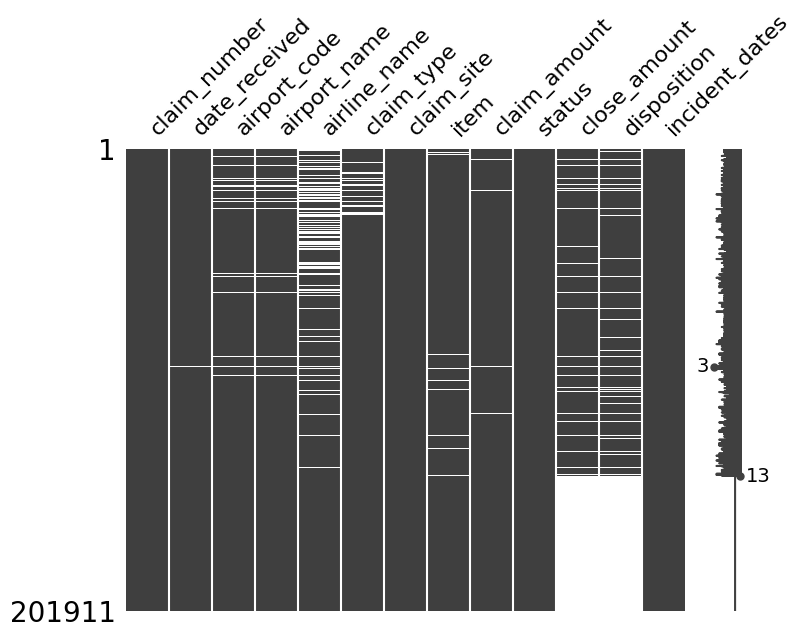

disposition       35.395298
close_amount      33.551416
airline_name      16.102639
airport_code       3.493618
airport_name       3.493618
claim_type         3.178133
item               1.864683
claim_amount       1.271352
claim_site         0.270416
date_received      0.068842
claim_number       0.000000
status             0.000000
incident_dates     0.000000
dtype: float64


In [46]:
msno.matrix(df, figsize=(8,6))
plt.show()
print((df.isna().sum().sort_values(ascending=False)/len(df)*100))

Dari pengamatan diatas, kita bisa mendapatkan:
* Kolom disposition dan close_amount memiliki jumlah missing values tertinggi.

In [47]:
# Drop row yang memiliki lebih dari 6 missing values, supaya data kita lebih reliable.
df.dropna(thresh=6, inplace=True)

print('Sebelum dilakukan drop dataset memiliki 201911 entries.')
print('Setelah di hapus baris yang memilki missing values lebih dari enam data set memiliki', len(df),'entries.')

Sebelum dilakukan drop dataset memiliki 201911 entries.
Setelah di hapus baris yang memilki missing values lebih dari enam data set memiliki 201846 entries.


### 1. Drop Disposition

In [48]:
df[['status', 'disposition']].head(10)

,status,disposition
0,Approved,Approve in Full
1,Settled,Settle
2,Settled,Settle
3,Approved,Approve in Full
4,Approved,Approve in Full
5,Settled,Settle
6,Approved,Approve in Full
7,Approved,Approve in Full
8,Denied,NaN
9,Denied,Deny


* Bisa dilihat dari data diatas nilai dari disposition sudah ditentukan oleh kolom status.  
Oleh Karena itu, lebih baik kita drop kolom disposition
dikarenakan missing valuenya yang sangat tinggi sekitar 35% dari total data.



In [49]:
df.drop(['disposition'], axis=1, inplace=True)

### 2. Missing Values Data Categorical

In [50]:
print((df.isna().sum().sort_values(ascending=False)/len(df)*100))

close_amount      33.532495
airline_name      16.077604
airport_code       3.462541
airport_name       3.462541
claim_type         3.149926
item               1.837540
claim_amount       1.245999
claim_site         0.238796
date_received      0.061928
claim_number       0.000000
status             0.000000
incident_dates     0.000000
dtype: float64


#### 2.a. Airline Name

In [51]:
# airport with most airline name = NaN
airport_code_most_nan = df.loc[df['airline_name'].isna()].value_counts(subset='airport_code').reset_index()
airport_code_most_nan = airport_code_most_nan.loc[airport_code_most_nan[0]>1]
airport_code_most_nan.head()

,airport_code,0
0,LAX,1649
1,ORD,994
2,MIA,915
3,JFK,876
4,EWR,862


In [52]:
most_freq_airlines = []

In [53]:
for i in airport_code_most_nan['airport_code']:
    a = df.loc[df['airport_code'] == i].value_counts(subset='airline_name').index[0]
    most_freq_airlines.append(a)

In [54]:
airport_code_most_nan['most_freq_airline'] = most_freq_airlines

print(airport_code_most_nan.head())

print('''
Berikut merupakan data airport_code yang memiliki nilai missing values diurutkan dari yang tertinggi,
dan juga airline yang paling sering mendarat di airport tersebut.
'''
)

  airport_code     0     most_freq_airline
0          LAX  1649                   UAL
1          ORD   994                   UAL
2          MIA   915     American Airlines
3          JFK   876              Jet Blue
4          EWR   862  Continental Airlines

Berikut merupakan data airport_code yang memiliki nilai missing values diurutkan dari yang tertinggi,
dan juga airline yang paling sering mendarat di airport tersebut.



In [55]:
df.reset_index(inplace=True)

In [56]:
# Buat dictioanry untuk membatu proses looping
airlines = dict(zip(airport_code_most_nan['airport_code'],airport_code_most_nan['most_freq_airline']))

In [57]:
airline_names = []
x = df['airline_name'].isna()

In [58]:
# Looping untuk mengisi nan values dengan dictionary diatas
for i in range(len(df['airport_code'])):
    if x[i] == False:
        airline_names.append(df['airline_name'][i])
    elif x[i] == True:
        if df['airport_code'][i] is not np.nan:
            code = df['airport_code'][i]
            if airlines.get(code) != None:
                airline_names.append(airlines[code])
            elif airlines.get(code) == None:
                airline_names.append('Others')
        elif df['airport_code'][i] is np.nan:
            airline_names.append('Others') 

In [59]:
# Mengganti values kolom yang lama
df['airline_name'] = airline_names

#### 2.b. airport_code & airport_name

In [60]:
df[['airport_code', 'airport_name']].isna().sum()

airport_code    6989
airport_name    6989
dtype: int64

* Untuk menangani missing values ini, kita cukup mengganti nan values menjadi 'Others'

In [61]:
df['airport_code'].fillna(value = 'Others', inplace = True)
df['airport_name'].fillna(value = 'Others', inplace = True)

#### 2.c. claim_type

In [62]:
df[['claim_type']].isna().sum()

claim_type    6358
dtype: int64

In [63]:
df[['claim_type']].value_counts()

claim_type             
Passenger Property Loss    117398
Property Damage             74981
Personal Injury              1453
Employee Loss (MPCECA)        485
Passenger Theft               465
Motor Vehicle                 368
Others                        282
Complaint                      48
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
dtype: int64

* Kita coba lihat nilai missing values claim_type berdasarkan claim_site-nya

In [64]:
loc_claim_type_nan = df.loc[df['claim_type'].isna()].value_counts(subset='claim_site').reset_index()
loc_claim_type_nan

,claim_site,0
0,Checked Baggage,4657
1,Checkpoint,892
2,Others,623
3,Motor Vehicle,6


In [65]:
most_freq_claim_type=[]

In [66]:
for i in loc_claim_type_nan['claim_site']:
    a = df.loc[df['claim_site'] == i].value_counts(subset='claim_type').index[0]
    most_freq_claim_type.append(a)

In [67]:
loc_claim_type_nan['most_freq_claim_type'] = most_freq_claim_type
loc_claim_type_nan

,claim_site,0,most_freq_claim_type
0,Checked Baggage,4657,Passenger Property Loss
1,Checkpoint,892,Property Damage
2,Others,623,Passenger Property Loss
3,Motor Vehicle,6,Motor Vehicle


* Diatas merupakan modus dari claim_type berdasarkan claim_site-nya

In [68]:
claims = dict(zip(loc_claim_type_nan['claim_site'], loc_claim_type_nan['most_freq_claim_type']))

In [69]:
claim_types = []
x = df['claim_type'].isna()

In [70]:
for i in range(len(df)):
    if x[i] == False:
        claim_types.append(df['claim_type'][i])
    elif x[i] == True :
        if df['claim_site'][i] is not np.nan:
            code = df['claim_site'][i]
            if claims.get(code) != None:
                claim_types.append(claims[code])
            elif claims.get(code) == None:
                claim_types.append('Others')
        elif df['claim_site'][i] is np.nan:
            claim_types.append('Others')

In [71]:
df['claim_type'] = claim_types

#### 2.c. claim_site

In [72]:
df.claim_site.isna().sum()

482

In [73]:
df.claim_site.value_counts()

Checked Baggage    158959
Checkpoint          39960
Others               1958
Motor Vehicle         471
Bus Station            16
Name: claim_site, dtype: int64

* Untuk menghandle nilai missing values kita akan menggantinya menjadi 'Others'
* Karena jumlahnya yang cukup kecil, sehingga tidak berpengaruh terhadap urutan dari yang jumlah terbesar sampai terkecil

In [74]:
df.claim_site.fillna(value='Others', inplace=True)

In [75]:
# Check jumlah missing value, setelah beberap proses diatas
df.isna().sum()

index                 0
claim_number          0
date_received       125
airport_code          0
airport_name          0
airline_name          0
claim_type            0
claim_site            0
item               3709
claim_amount       2515
status                0
close_amount      67684
incident_dates        0
dtype: int64

### 3. Close_Amount Missing Values

In [76]:
df[['claim_amount','status', 'close_amount']]

,claim_amount,status,close_amount
0,350.00,Approved,$350.00
1,100.00,Settled,$50.00
2,278.88,Settled,$227.92
3,50.00,Approved,$50.00
4,84.79,Approved,$84.79
...,...,...,...
201841,0.00,In Process,NaN
201842,0.00,In Process,NaN
201843,0.00,In Process,NaN
201844,0.00,In Process,NaN


* Bisa dilihat dari data diatas nilai dari close_amount bergantung terhadapa nilai 
claim_amount dan juga statusnya.
* Jika Approved nilai close_amount cenderung sama dengan claim_amount.
* Jika Denied nilai close_amount cenderung sama dengan 0, begitu juga jika klaim dalam status 'In Process'.
* Jika Settled nilai close_amount bisa berbeda dengan claim_amount, kemungkinan lebih kecil dari nilai claim.  
* Untuk pengisian missing values akan berfokus pada yang berstatus Settled.

#### 2.a. Settled

In [77]:
# Fix the format close_amount

df["close_amount"] = df.close_amount.str.strip()

# kita mencoba mengilangkan simbol ';' , '$' , dan mengganti simbol '-' menjadi 0
df["close_amount"] = df.close_amount.str.replace(";","",regex=True).str.replace("$","",regex=True)

# kita masukan ke kolom yang baru untuk mempermudah workflow
df["close_amount"] = df.close_amount.astype(float)


In [78]:
df[['claim_type','claim_amount', 'close_amount']].loc[df['status']=='Settled'].isna().sum()

claim_type         0
claim_amount      89
close_amount    5764
dtype: int64

* Kita ingin mencari metode yang tepat untuk pengisian missing values yang memiliki nilai settled.

In [79]:
# Membuat variable untuk yang data berstatus settled saja

settled = df[['claim_type','claim_amount', 'close_amount']].loc[df['status']=='Settled']

# kita drop missing values-nya
settled.dropna(inplace=True)

# difference between claim and close amount
settled['diff'] = settled.claim_amount - settled.close_amount

In [80]:
settled.head()

,claim_type,claim_amount,close_amount,diff
1,Property Damage,100.00,50.00,50.00
2,Property Damage,278.88,227.92,50.96
5,Passenger Property Loss,459.01,227.00,232.01
18,Passenger Property Loss,600.00,337.40,262.60
19,Passenger Property Loss,160.00,149.08,10.92


In [81]:
settled.claim_type.value_counts()

Passenger Property Loss    15833
Property Damage            11434
Personal Injury              123
Passenger Theft              113
Employee Loss (MPCECA)        95
Motor Vehicle                 29
Others                        11
Name: claim_type, dtype: int64

In [82]:
# Cek data diff yang bernilai kurang dari 0

settled.loc[settled['diff']<0].groupby(by='claim_type').mean()

,claim_amount,close_amount,diff
claim_type,,,
Employee Loss (MPCECA),0.000000,142.350000,-142.350000
Passenger Property Loss,115.477143,191.623571,-76.146429
Property Damage,231.891667,317.252778,-85.361111


<Axes: xlabel='claim_amount'>

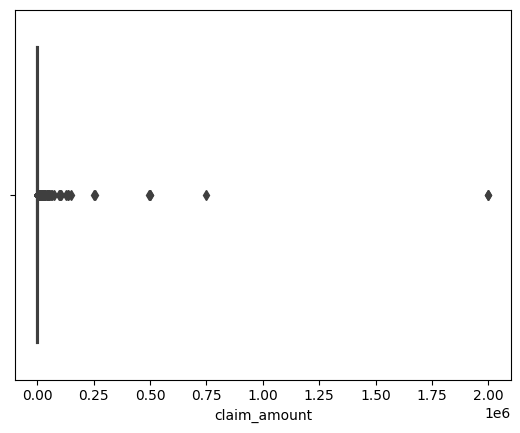

In [83]:
# Check Outlier claim_amout

sns.boxplot(data=settled, x = 'claim_amount')

In [84]:
settled['claim_amount'].describe()

count    2.763800e+04
mean     8.046435e+02
std      1.865293e+04
min      0.000000e+00
25%      1.020775e+02
50%      2.140200e+02
75%      4.500000e+02
max      2.000000e+06
Name: claim_amount, dtype: float64

In [85]:
# Define Interquartile range
Q1 = settled['claim_amount'].describe()['25%']
Q3 = settled['claim_amount'].describe()['75%']
IQR = Q3 -Q1


Q1Outlier = Q1 - (1.5 * IQR)
Q3Outlier = Q3 + (1.5 * IQR)

In [86]:
# Data Settled with no oulier
settled_no_outlier = settled.loc[settled['claim_amount'].between(Q1Outlier,Q3Outlier)]
settled_no_outlier.describe()

,claim_amount,close_amount,diff
count,24506.000000,24506.000000,24506.000000
mean,250.363884,130.067241,120.296643
std,201.886047,123.946446,118.170578
min,0.000000,0.000000,-198.980000
25%,100.000000,50.000000,38.642500
50%,190.800000,85.000000,79.990000
75%,350.000000,176.000000,161.312500
max,970.920000,964.000000,897.000000


C:\Users\Irfan\AppData\Local\Temp\ipykernel_10444\1102074279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = settled_no_outlier['close_amount'])


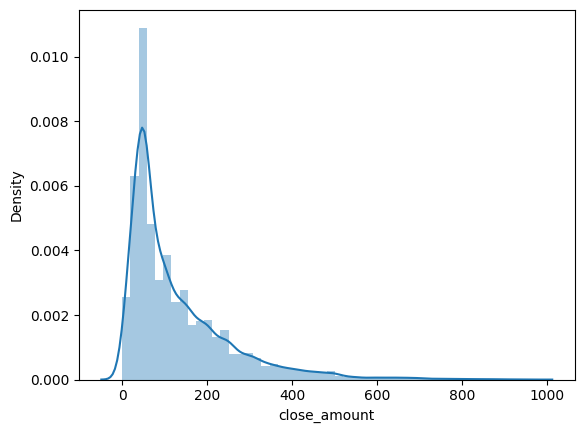

In [87]:
sns.distplot(a = settled_no_outlier['close_amount'])
plt.show()

In [88]:
diff = round(settled_no_outlier['close_amount'].describe()['50%']/settled_no_outlier['claim_amount'].describe()['50%'],2)

diff

0.45

Untuk mengisi missing values dari close_amount, saya melakukan:
* Mencoba mencari persentase median perbedaan antara claim_amount dan close_amount, dimana data tersebut berada dalam IQR.
* Persentase antara median claim_amount dan close_amount adalah 45% atau 0.45
* Kita bisa masukan nilai diatas ke fungsi dibawah ini

In [89]:
df = df.reset_index()

In [90]:
close_values = []
x = df['close_amount'].isna()

for i in range(len(df)):
    if x[i] == False:
       close_values.append(df['close_amount'][i]) 
    elif x[i] == True:
        if df['status'][i] == 'Approved':
            close_values.append(df['claim_amount'][i])
        elif df['status'][i] == 'Denied':
            close_values.append(0)
        elif df['status'][i] == 'In Process':
            close_values.append(0)
        elif df['status'][i] == 'Settled':
            s = df['claim_amount'][i]*diff
            close_values.append(s) 
       

In [91]:
df['close_amount'] = close_values

In [92]:
df['close_amount'].isna().sum()

4

In [93]:
# Masih ada 4 nilai missing kita akan drop saja
df.dropna(subset='close_amount', inplace=True)

In [94]:
df['close_amount'] = round(df['close_amount'],2)

In [95]:
df['close_amount'].describe()

count    201842.000000
mean         79.836566
std         765.564847
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max      250000.000000
Name: close_amount, dtype: float64

### 4. Claim_Amount Missing Values

In [96]:
# Jumlah missing Values
print(df['claim_amount'].isna().sum())

print(df['claim_amount'].isna().sum()/len(df))

2511
0.01244042369774378


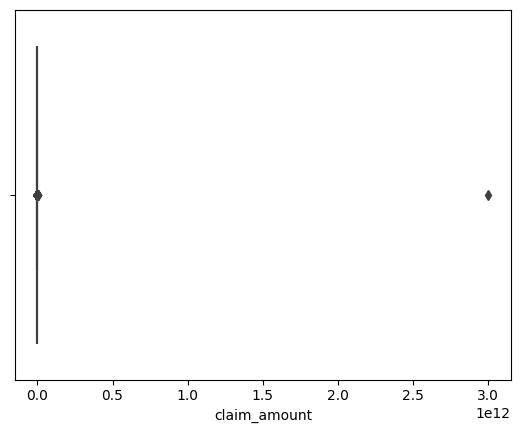

In [97]:
# Check for outlier
sns.boxplot(data=df, x = 'claim_amount')
plt.show()

In [98]:
df['claim_amount'].max()

3000000000000.0

In [99]:
df.loc[df['claim_amount'] == df['claim_amount'].max()]

,level_0,index,claim_number,date_received,airport_code,airport_name,airline_name,claim_type,claim_site,item,claim_amount,status,close_amount,incident_dates
115886,115886,118207,2008012238289,2008-02-12,JFK,John F. Kennedy International,Jet Blue,Personal Injury,Checkpoint,NaN,3.000000e+12,Denied,0.0,2007-12-28


In [100]:
df['claim_amount'].describe()

count    1.993310e+05
mean     1.512118e+07
std      6.719473e+09
min      0.000000e+00
25%      1.500000e+01
50%      1.000000e+02
75%      3.200000e+02
max      3.000000e+12
Name: claim_amount, dtype: float64

In [101]:
Q1 = df['claim_amount'].describe()['25%']
Q3 = df['claim_amount'].describe()['75%']

IQR = Q3 - Q1

Q1Outlier = Q1 - (1.5 * IQR)
Q3Outlier = Q3 + (1.5 * IQR)

print(Q1Outlier, Q3Outlier)

-442.5 777.5


In [102]:
df_claim_amount_no_outlier = df.loc[df['claim_amount'].between(Q1Outlier,Q3Outlier)]

In [103]:
df_above_Q3 = df.loc[df['claim_amount'] > Q3Outlier]

len(df_above_Q3)/len(df['claim_amount'])*100

11.52039714231924

In [104]:
df_below_Q1 = df.loc[df['claim_amount'] < Q1Outlier]

df_below_Q1['claim_amount'].sort_values(ascending=False).head()

Series([], Name: claim_amount, dtype: float64)

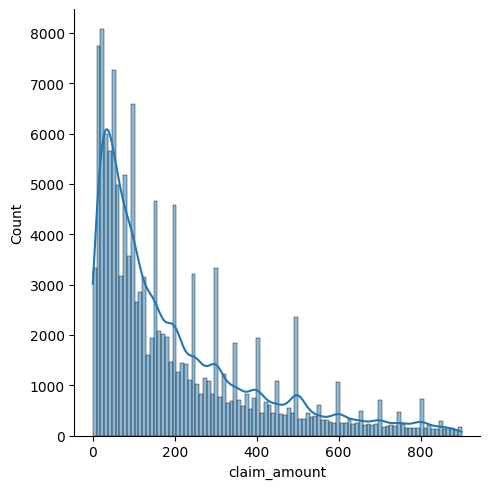

In [105]:
sns.displot(df.claim_amount[(df.claim_amount>0)&(df.claim_amount<900)], kde=True)
plt.show()

Dari hasil analisis diatas kita bisa simpulkan bahwa:
* Claim_amount masih memiliki 2511 missing values, sekitar 1.2 % dari dataset.
* Claim_amount memiliki outlier yang cukup banyak sekitar 11% dari kesulurhan data.
* Claim_amount juga memiliki data yang tidak terdistribusi normal.

Oleh karena itu, kita akan mengisi missing values dari kolom claim_amount, menggunakan nilai median berdasarkan claim_type-nya.

In [106]:
df.groupby('claim_type')['claim_amount'].median()

claim_type
Bus Terminal               140.00
Complaint                    0.00
Compliment                   0.00
Employee Loss (MPCECA)     122.86
Motor Vehicle              741.04
Others                       0.00
Passenger Property Loss    100.00
Passenger Theft            182.00
Personal Injury            675.03
Property Damage             99.95
Wrongful Death               0.00
Name: claim_amount, dtype: float64

In [107]:
df['claim_amount'] = df[['claim_amount', 'claim_type']].groupby('claim_type').transform(lambda x : x.fillna(x.median()))

In [108]:
df['claim_amount'].isna().sum()

0

### 5. Drop Columns Item

In [109]:
df.item.unique()

array(['Other', 'Luggage (all types including footlockers)',
       'Cell Phones', ...,
       'Baggage/Cases/Purses; Musical Instruments & Accessories; Musical Instruments & Accessories',
       'Clothing; Clothing; Hunting & Fishing Items; Sporting Equipment & Supplies',
       'Cameras; Clothing; Clothing; Clothing; Clothing; Jewelry & Watches; Jewelry & Watches'],
      dtype=object)

In [110]:
df.item.value_counts()

Other                                                                                                                            36354
Luggage (all types including footlockers)                                                                                        18620
Clothing - Shoes; belts; accessories; etc.                                                                                       14662
Jewelry - Fine                                                                                                                    9777
Locks                                                                                                                             9417
                                                                                                                                 ...  
Cards - Playing; Other                                                                                                               1
Boxes - Jewelry; Cigarette; Music; etc.; Currency; Lock

* Dari pengamatan diatas kolom item memiliki cukup banyak value unique, sehingga cukup sulit untuk menklasifikasikannya.
* Oleh karena itu, untuk data analysis kolom item akan di drop, karena kolom item butuh pengklasifikasian lebih lanjut untuk mendapatkan informasi penting dari dataset.

In [111]:
df.drop(labels='item', axis = 1, inplace=True)

## C. Final Cleaning

In [112]:
df.isna().sum()

level_0             0
index               0
claim_number        0
date_received     125
airport_code        0
airport_name        0
airline_name        0
claim_type          0
claim_site          0
claim_amount        0
status              0
close_amount        0
incident_dates      0
dtype: int64

In [113]:
# Drop missing values di date_received

df.dropna(subset='date_received',inplace=True)

In [114]:
df

,level_0,index,claim_number,date_received,airport_code,airport_name,airline_name,claim_type,claim_site,claim_amount,status,close_amount,incident_dates
0,0,0,0909802M,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00,2002-12-12
1,1,1,0202417M,2002-02-02,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,100.00,Settled,50.00,2004-01-16
2,2,2,0202445M,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92,2003-11-26
3,3,3,0909816M,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00,2003-01-06
4,4,4,2005032379513,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79,2005-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201841,201841,204262,2015120427297,2015-11-20,Others,Others,Others,Property Damage,Checked Baggage,0.00,In Process,0.00,2015-10-16
201842,201842,204263,2015123027969,2015-12-17,Others,Others,Others,Property Damage,Checked Baggage,0.00,In Process,0.00,2015-12-02
201843,201843,204264,2016010428072,2015-12-22,Others,Others,Others,Passenger Property Loss,Checked Baggage,0.00,In Process,0.00,2015-12-20
201844,201844,204265,2016011328300,2015-12-30,Others,Others,Others,Passenger Property Loss,Checked Baggage,0.00,In Process,0.00,2015-12-28


In [115]:
df.drop(labels=['level_0', 'index'], axis=1, inplace=True)

In [116]:
df.head()

,claim_number,date_received,airport_code,airport_name,airline_name,claim_type,claim_site,claim_amount,status,close_amount,incident_dates
0,0909802M,2002-01-04,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00,2002-12-12
1,0202417M,2002-02-02,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,100.00,Settled,50.00,2004-01-16
2,0202445M,2002-02-04,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92,2003-11-26
3,0909816M,2002-02-07,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00,2003-01-06
4,2005032379513,2002-02-18,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79,2005-02-05


In [117]:
df.columns

Index(['claim_number', 'date_received', 'airport_code', 'airport_name',
       'airline_name', 'claim_type', 'claim_site', 'claim_amount', 'status',
       'close_amount', 'incident_dates'],
      dtype='object')

In [118]:
df2 = df[['claim_number','date_received','incident_dates', 'airport_code', 'airport_name',
    'airline_name','claim_type', 'claim_site', 'claim_amount', 'status','close_amount']]

In [119]:
# Menghilangkan date received diluar dari tahun 2002 - 2015
df2 = df2[df2.date_received.dt.year.isin(range(2002,2016))]
df2 = df2[df2.incident_dates.dt.year.isin(range(2002,2016))]

# Clean Dataset
df2.head()

,claim_number,date_received,incident_dates,airport_code,airport_name,airline_name,claim_type,claim_site,claim_amount,status,close_amount
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,100.00,Settled,50.00
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79


# Data Analysis

In [120]:
df2.head()

,claim_number,date_received,incident_dates,airport_code,airport_name,airline_name,claim_type,claim_site,claim_amount,status,close_amount
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,350.00,Approved,350.00
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,100.00,Settled,50.00
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,278.88,Settled,227.92
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,50.00,Approved,50.00
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,84.79,Approved,84.79


Setelah Data berhasil dibersihkan, selanjutnya kita akan coba menganalisis data lebih dalam, untuk mencari informasi penting yang dapat membantu stakeholder terkait    
untuk meningkatkan pelayanan terhadap penumpang untuk menurunkan laporan klaim yang diajukan.

## A. Claim Per Year

In [121]:
# claim per year
claim_per_year = pd.DataFrame(df2.groupby(df2.date_received.dt.year)['claim_type'].count().reset_index())
claim_per_year

,date_received,claim_type
0,2002,932
1,2003,21107
2,2004,29504
3,2005,24341
4,2006,18981
5,2007,18549
6,2008,16386
7,2009,12761
8,2010,10925
9,2011,10905


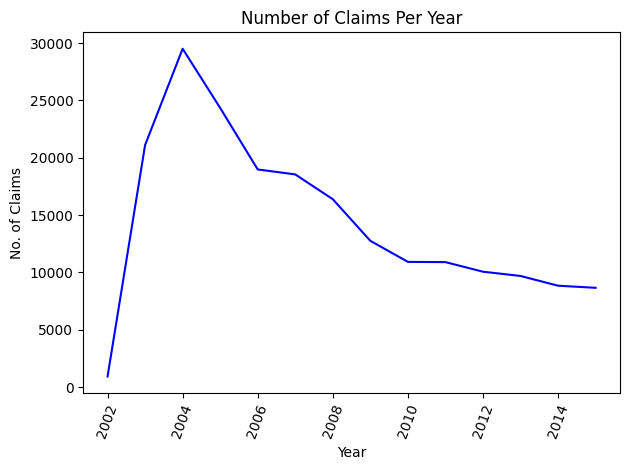

In [122]:
sns.lineplot(data = claim_per_year, x= 'date_received', y='claim_type', color = 'blue')

plt.title('Number of Claims Per Year')
plt.xlabel('Year')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Berdasarkan grafik diatas, kita bisa simpulkan:
* 2002 memiliki laporan klaim yang paling sedikit kemungkinan karena, 2002 menjadi titik awal pengumpulan data.
* 2004 menjadi tahun yang paling banyak memiliki laporan klaim sekitar > 29000 laporan
* Semenjak 2004, terjadi penurunan jumlah klaim setiap tahunnya.

## B. Claim Per Month

In [123]:
# claim per month
claim_per_month = pd.DataFrame(df2.groupby(df2.incident_dates.dt.month)['claim_type'].count().reset_index())
claim_per_month

,incident_dates,claim_type
0,1,17042
1,2,14589
2,3,17065
3,4,16096
4,5,17255
5,6,17345
6,7,17995
7,8,18262
8,9,16050
9,10,16567


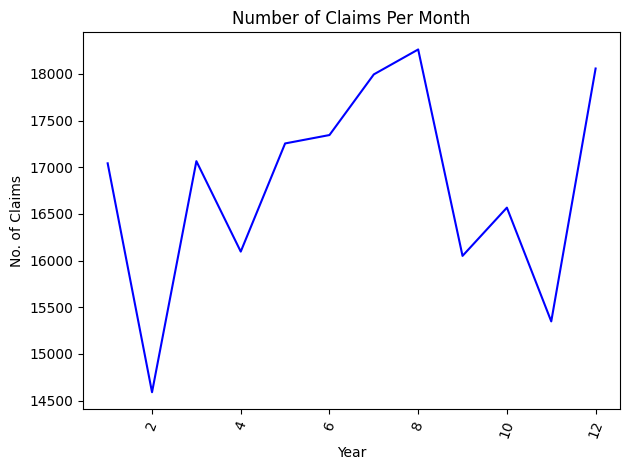

In [124]:
sns.lineplot(data = claim_per_month, x= 'incident_dates', y='claim_type', color = 'blue')

plt.title('Number of Claims Per Month')
plt.xlabel('Year')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Dari Grafik diatas kita bisa simpulkan:
* Lonjakan klaim terjadi pada musim liburan, tepatnya pada Des-Jan bertepatan dengan Tahun Baru dan Natal, dan juga Juni - Agustus yang merupakan Summer Break
sehingga banyak warga AS yang berpergian.

## C. Claim Per Airport

In [125]:
# claim per airport_code
claim_per_airport = pd.DataFrame(df2.groupby(df2.airport_code)['claim_type'].count().reset_index().sort_values(by='claim_type',ascending=False).head(10))
claim_per_airport

,airport_code,claim_type
245,LAX,9543
231,JFK,9191
327,Others,7411
137,EWR,6834
320,ORD,6809
287,MIA,6397
275,MCO,6368
27,ATL,5841
398,SEA,5373
339,PHX,5045


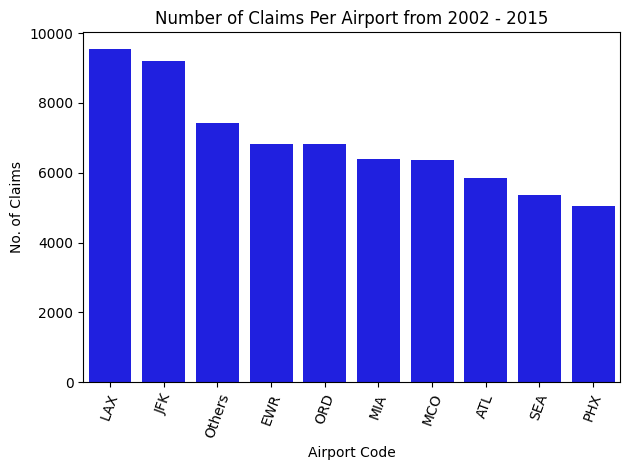

In [126]:
sns.barplot(data = claim_per_airport, x= 'airport_code', y='claim_type', color = 'blue')

plt.title('Number of Claims Per Airport from 2002 - 2015')
plt.xlabel('Airport Code')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Berdasarkan grafik diatas, kita bisa simpulkan:
* LAX atau Los Angeles International Airport menjadi peringkat teratas untuk jumlah laporan klaim, dengan total > 9500.
* Diikuti dengan JFK International Airport diposisi kedua dengan jumlah laporan > 9100.


## D. Claim Per Claim Type

In [127]:
# claim per airport_code
claim_per_claim_type = pd.DataFrame(df2.groupby(df2.claim_type)['status'].count().reset_index().sort_values(by='status',ascending=False).head())
claim_per_claim_type

,claim_type,status
6,Passenger Property Loss,122585
9,Property Damage,75795
8,Personal Injury,1452
3,Employee Loss (MPCECA),485
7,Passenger Theft,463


In [128]:
property_loss = round(claim_per_claim_type['status'][6] / claim_per_claim_type['status'].sum()*100,2)
property_damage = round(claim_per_claim_type['status'][9] / claim_per_claim_type['status'].sum()*100,2)

print(f'''
Persentase claim properti loss = {property_loss}%

Persentase properti damage = {property_damage}%
''')



Persentase claim properti loss = 61.05%

Persentase properti damage = 37.75%



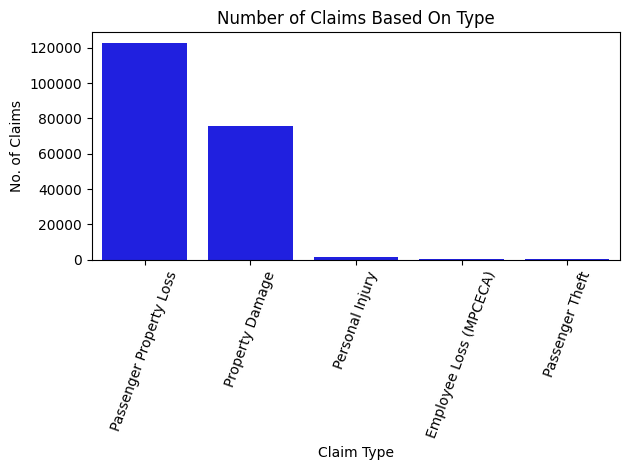

In [129]:
sns.barplot(data = claim_per_claim_type, x= 'claim_type', y='status', color = 'blue')

plt.title('Number of Claims Based On Type')
plt.xlabel('Claim Type')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Berdasarkan grafik diatas, kita bisa simpulkan:
* Passenger Property Loss dan Property Damage menjadi tipe klaim yang mendominasi pelaporan klaim terhadap TSA
* Hal ini wajar, karena di bandara ada proses scanning yang mewajibkan penumpang untuk melepaskan barang yang dipakai atau dibawa sebelum masuk ke proses scanning.
* Hal ini bisa disebabkan oleh kelalaian pegawai airline atau TSA itu sendiri.
* Atau penumpang yang tidak mematuhi peraturan dan regulasi dalam *packing* barang bawaan.

## E. Claim Per Claim Site

In [130]:
# claim per airport_code
claim_per_claim_site = pd.DataFrame(df2.groupby(df2.claim_site)['status'].count().reset_index().sort_values(by='status',ascending=False).head(3))
claim_per_claim_site['persentase'] = round(claim_per_claim_site['status']/claim_per_claim_site['status'].sum()*100,2)
claim_per_claim_site

,claim_site,status,persentase
1,Checked Baggage,158852,78.96
2,Checkpoint,39896,19.83
4,Others,2437,1.21


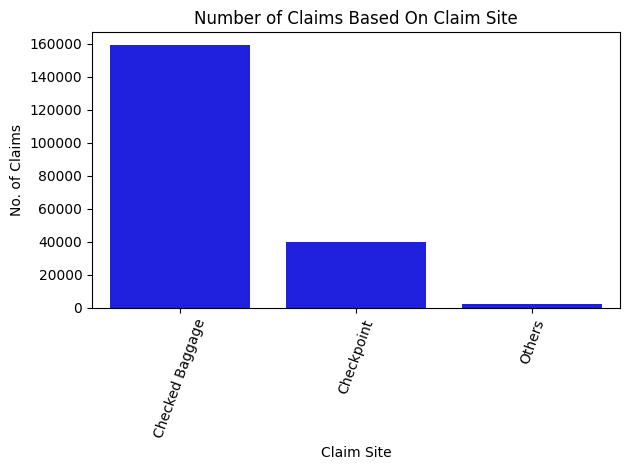

In [131]:
sns.barplot(data = claim_per_claim_site, x= 'claim_site', y='status', color = 'blue')

plt.title('Number of Claims Based On Claim Site')
plt.xlabel('Claim Site')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Berdasarkan grafik diatas, kita bisa simpulkan:
* Checked Baggage menjadi tempat utama dimana passenger kehilangan barang atau barang mengalami kerusakan.
* Barang yang hilang atau rusak di area checked baggage menjadi tanggung jawab airline setelah barang tersebut melewati *sorting system* bandara.
* Kemudian, lokasi kedua paling banyak laporan klaim adalah checkpoint. Barang yang hilang atau rusak di Checkpoint merupakan tanggung jawab penuh TSA.

## F. Claim Per Airline

In [132]:
# claim per airport_code
claim_per_airline = pd.DataFrame((df2.groupby(df2.airline_name))['status'].count().reset_index().sort_values(by='status',ascending=False).head(10))
claim_per_airline

,airline_name,status
96,Delta Air Lines,28627
196,Southwest Airlines,27862
53,American Airlines,27366
215,UAL,24221
218,USAir,14791
88,Continental Airlines,12760
158,Northwest Airlines,10553
163,Others,9260
134,Jet Blue,8837
44,Alaska Airlines,8176


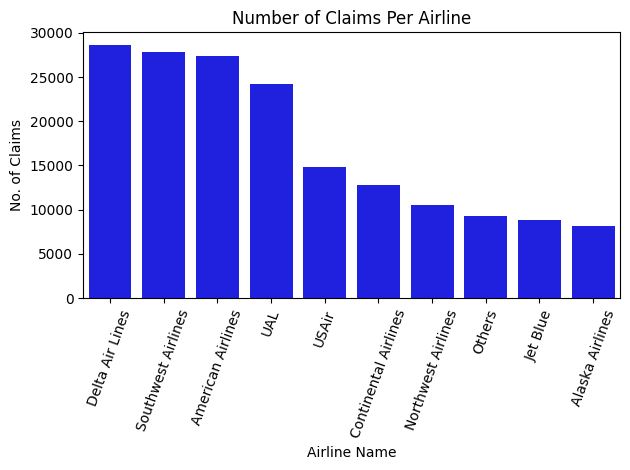

In [133]:
sns.barplot(data = claim_per_airline, x= 'airline_name', y='status', color = 'blue')

plt.title('Number of Claims Per Airline')
plt.xlabel('Airline Name')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

In [134]:
df2.loc[df2.airline_name == 'Delta Air Lines']['airport_code'].value_counts().head()

ATL    4169
JFK    1726
LAX     900
CVG     899
SLC     850
Name: airport_code, dtype: int64

Berdasarkan grafik diatas, kita bisa simpulkan:
* Delta Air Lines, menjadi maskapai penerbangan yang paling banyak memiliki laporan klaim.

## G. Claim Per Status

In [135]:
# claim per airport_code
claim_status = pd.DataFrame((df2.groupby(df2.status))['claim_type'].count().reset_index().sort_values(by='status',ascending=False))
claim_status['persentase'] = round(claim_status['claim_type'] / claim_status['claim_type'].sum() *100,2)
claim_status

,status,claim_type,persentase
3,Settled,33448,16.59
2,In Process,18689,9.27
1,Denied,102485,50.82
0,Approved,47050,23.33


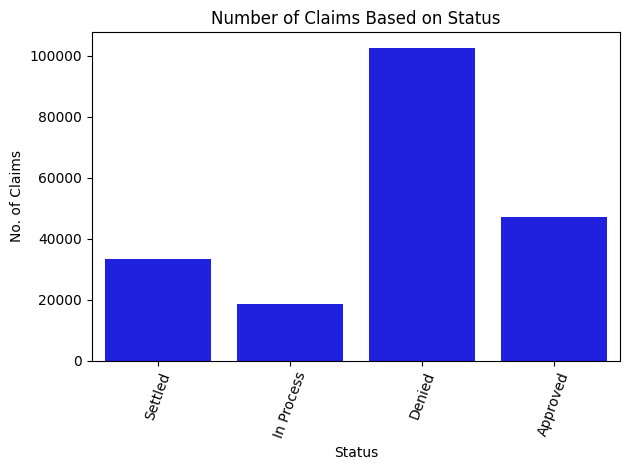

In [136]:
sns.barplot(data = claim_status, x= 'status', y='claim_type', color = 'blue')

plt.title('Number of Claims Based on Status')
plt.xlabel('Status')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Berdasarkan grafik diatas, kita bisa simpulkan:
* Kebanyakan klaim yang dilayangkan oleh penumpang mendapatkan status *denied* oleh TSA, hal ini bisa disebabkan oleh beberapa sebab:
> * Kurangnya dokumen atau bukti kepemilikan barang tersebut.
> * Setelah investigasi dari TSA tidak ditemukan bukti yang cukup untuk menerima klaim tersebut.
> * Kerusakan atau kehilangan barang bukan merupakan tanggung jawab TSA.


## H. Approved Claim Type

In [137]:
approved_claim = df2.loc[(df2['status']=='Approved') | (df2['status']=='Settled')]
approved_claim = pd.DataFrame((approved_claim.groupby(approved_claim.claim_type))['status'].count().reset_index().sort_values(by='status',ascending=False).head())
approved_claim

,claim_type,status
5,Passenger Property Loss,43022
8,Property Damage,36423
2,Employee Loss (MPCECA),275
6,Passenger Theft,253
7,Personal Injury,245


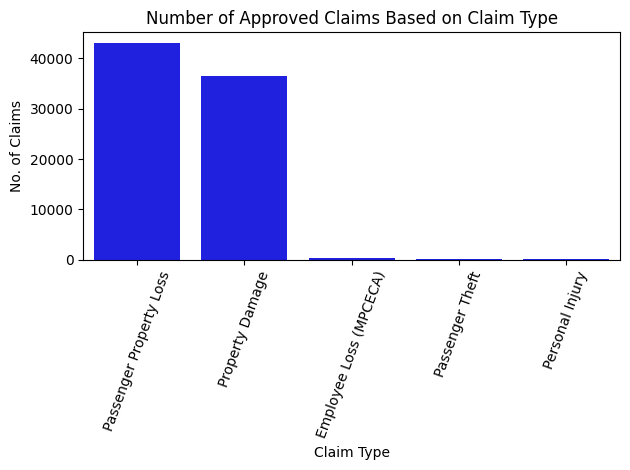

In [138]:
sns.barplot(data = approved_claim , y= 'status', x='claim_type', color = 'blue')

plt.title('Number of Approved Claims Based on Claim Type')
plt.xlabel('Claim Type')
plt.ylabel('No. of Claims')
plt.xticks(rotation=70)
plt.tight_layout()

Berdasarkan grafik diatas, kita bisa simpulkan:
* Klaim yang disetujui oleh TSA didominasi oleh property loss dan property damage


## H. Reimbursed Claim

In [139]:
approved_claim = df2.loc[(df2['status']=='Approved') | (df2['status']=='Settled')]

In [149]:
close = approved_claim.groupby('claim_type')['close_amount'].sum()

In [150]:
claim = round(approved_claim.groupby('claim_type')['claim_amount'].sum(),2)

In [165]:
withold_payment= claim - close

In [179]:
claim_reimbursed = pd.DataFrame({'Reimbursed' : close, 'Withold Payment' : claim-close})
                                
claim_reimbursed = claim_reimbursed.sort_values(by='Reimbursed', ascending=False)

claim_reimbursed

,Reimbursed,Withold Payment
claim_type,,
Passenger Property Loss,7330532.47,4915727.49
Property Damage,6390903.94,3111664.76
Personal Injury,815795.09,8347141.72
Motor Vehicle,302017.40,43491.30
Passenger Theft,59641.10,32346.16
Employee Loss (MPCECA),46399.07,19689.87
Others,14049.42,4946.41
Complaint,348.35,0.00
Bus Terminal,63.00,77.00


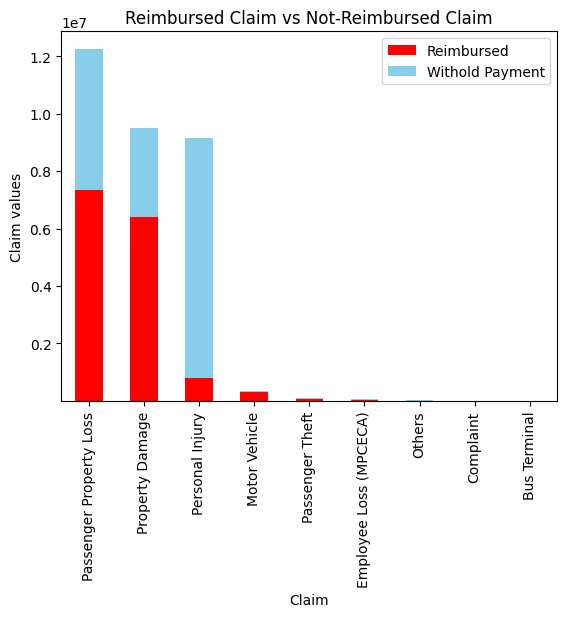

In [180]:
claim_reimbursed.plot(kind='bar', stacked=True, color=['red', 'skyblue'])


plt.title('Reimbursed Claim vs Not-Reimbursed Claim')
plt.xlabel('Claim')
plt.ylabel('Claim values')

plt.show()

In [183]:
claim_reimbursed['persentase'] = claim_reimbursed['Reimbursed'] / (claim_reimbursed['Reimbursed'] + claim_reimbursed['Withold Payment']) *100

claim_reimbursed

,Reimbursed,Withold Payment,persentase
claim_type,,,
Passenger Property Loss,7330532.47,4915727.49,59.859357
Property Damage,6390903.94,3111664.76,67.254488
Personal Injury,815795.09,8347141.72,8.903205
Motor Vehicle,302017.40,43491.30,87.412386
Passenger Theft,59641.10,32346.16,64.836261
Employee Loss (MPCECA),46399.07,19689.87,70.207012
Others,14049.42,4946.41,73.960548
Complaint,348.35,0.00,100.000000
Bus Terminal,63.00,77.00,45.000000


* 59.85 % dari nilai klaim property Loss berhasil di klaim oleh penumpang
* 67.25 % dari nilai klaim property damage berhasil di klaim oleh penumpang 

In [186]:
#

all_type_reimbursed = round(claim_reimbursed['Reimbursed'].sum() / (claim_reimbursed['Reimbursed'].sum() + claim_reimbursed['Withold Payment'].sum()) *100,2)

print(f'Dari keseluruhan claim yang diajukan TSA hanya membayar {all_type_reimbursed}% nilai klaim')

Dari keseluruhan claim yang diajukan TSA hanya membayar 47.59% nilai klaim


# Kesimpulan

Dari Analisis yang sudah kita lakukan diatas dapat disimpulkan bahwa:
* Jumlah pengajuan klaim paling tinggi pada tahun 2004, akan tetapi setelah 2004 jumlah laporan klaim mengalami penurunan.

* Jumlah klaim meningkat pada bulan musim liburan seperti Desember, Januari, Juli, dan Agustus. Yang mana bulan tersebut bertepatan dengan Christmas & New Year, & Summer Break.

* Tipe klaim yang paling banyak diajukan adalah *property loss* dan *property damage* dengan persentase masing-masing 61.06% dan 37.75% dari total keseluruhan klaim.

* Bandara dengan jumlah pengajuan klaim terbanyak adalah Los Angeles International Airport (LAX), dengan total 9543 klaim sepanjang tahun 2002 sampai 2015.

* Airline yang memiliki laporan klaim tertinggi adalah Delta Air Lines, dengan total jumlah laporan sebesar 28632 klaim sepanjang tahun 2002 sampai 2015.

* Lokasi yang paling sering dilaporkan dalam klaim adalah *Checked Baggage* dengan persentase 78.96% dari total klaim, diikuti dengan *Checkpoint* sebesar 19.83%.

* Status klaim sebanyak 50.82% di *Denied* oleh TSA, sementara klaim yang *Approved* dan *Settled* masing-masing sebesar 23.33 % dan 16.59%.

* Dari klaim yang di *Approved* dan *Settled* tersebut hanya 47.59% dari total *claim amount* yang dikembalikan kepada penumpang. Dimana property damage, property loss, dan personal injury menjadi penyumbang terbesar.



# Rekomendasi

Rekomendasi

1. Stakeholder terkait agar lebih waspada dan teliti pada saat musim liburan tiba. Bisa dilihat dari grafik sebelumnya jumlah klaim cenderung meningkat pada musim liburan. Terutama bulan Desember, Januari, Juli, dan Agustus

2. Lokasi tempat insiden klaim terjadi kebanyakan di Area Checked Baggage. Yang dimana merupakan tanggung jawab Airline. Airline bisa bekerja sama dengan pihak Airport dan TSA untuk meningkatkan keamanan di wilayah checked baggage mereka. Terutama Airline yang memiliki jumlah klaim yang cukup tinggi seperti Delta Air Lines, Southwest Airlines, dan American Airlines.

3. Pihak Airport dan TSA bisa meningatkan keamanan di Airport yang memiliki laporan klaim yang cukup tinggi seperti LAX, dan JFK.

4. Dilihat dari klaim yang sudah di Reimbursed oleh penumpang, TSA bisa berupaya untuk mengurangi terjadinya Property Loss, Property Damage, dan Personal Injury untuk mengurangi uang yang harus dikeluarkan TSA sebagai bentuk ganti rugi. 

In [146]:
df2.to_excel(excel_writer=r'D:\Dokumen\Kerja\File Capstone 2\tsaclaims.xlsx',index=False)